# Assignment 10: More on Choropleth, Folium Map, and Raster Data

In [ ]:
!pip install mapclassify #helper package
!pip install osmnx
!pip install rioxarray

import geopandas as gpd # import geopandas
import osmnx as ox # import osmnx
import folium as fm # import folium
import rioxarray as rxr #import rioxarray

# packages you already familiar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import shapely.geometry

*NOTE: YOU MAY ENCOUNTER WARNING MESSGAE WHEN RUNNING THE GIVEN CODE AND SOLUTION, PLEASE INGORE IT*

## Q1. Health Network Fairness in Choropleth

### Q1a

**Your Text Answer**
To get the distribution of clinics : {Amenity : clinic}. To get the distribution of hospitals : {Building : hospital}. To get the distribution of pharmacys : {Emergency : ambulance_station}

### Q1b

In [ ]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
place = 'toronto, ontario, canada'
tag = {'amenity': ['hospital', 'clinic']}
toronto_hospital = ox.features_from_place(place, tags=tag)
toronto_hospital = toronto_hospital[toronto_hospital['emergency'] == 'yes'][['name', 'geometry']].reset_index(drop=True)
toronto_hospital['proerpty_type'] = 'hospital'
toronto_hospital['geometry'] = toronto_hospital['geometry'].apply(lambda x: x.centroid)
toronto_hospital.head()

,name,geometry,proerpty_type
0,Scarborough Health Network - Centenary Hospital,POINT (-79.20481 43.78025),hospital
1,Centre For Addiction and Mental Health - Queen...,POINT (-79.41864 43.64300),hospital
2,Sunnybrook Health Sciences Centre - Bayview Ca...,POINT (-79.37479 43.72270),hospital
3,Toronto Western Hospital,POINT (-79.40548 43.65351),hospital
4,St. Joseph's Health Centre,POINT (-79.45006 43.64030),hospital


In [ ]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
!wget https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
!unzip lfsa000a16a_e.zip -d lfsa000a16a_e

toronto_FSA = gpd.read_file('lfsa000a16a_e')
# 'CFSAUID' start with m
toronto_FSA = toronto_FSA[toronto_FSA['CFSAUID'].str.startswith('M')]
toronto_FSA = toronto_FSA[['CFSAUID', 'geometry']]
toronto_FSA['proerpty_type'] = 'FSA'
toronto_FSA.columns = ['name', 'geometry', 'proerpty_type']
toronto_FSA.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2024-03-30 02:51:01--  https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/files-fichiers/2016/lfsa000a16a_e.zip
Resolving www12.statcan.gc.ca (www12.statcan.gc.ca)... 167.44.105.15
Connecting to www12.statcan.gc.ca (www12.statcan.gc.ca)|167.44.105.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15662579 (15M) [application/x-zip-compressed]
Saving to: ‘lfsa000a16a_e.zip.1’

lfsa000a16a_e.zip.1 100%[===================>]  14.94M   182KB/s    in 90s     

2024-03-30 02:52:31 (171 KB/s) - ‘lfsa000a16a_e.zip.1’ saved [15662579/15662579]

Archive:  lfsa000a16a_e.zip
replace lfsa000a16a_e/lfsa000a16a_e.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

,name,geometry,proerpty_type
637,M9R,"POLYGON ((7209908.140 928259.897, 7209816.766 ...",FSA
638,M9V,"POLYGON ((7206682.694 937743.451, 7206631.563 ...",FSA
639,M9W,"POLYGON ((7210531.760 934710.503, 7210542.117 ...",FSA
701,M1P,"POLYGON ((7233594.731 942118.174, 7233584.157 ...",FSA
702,M1R,"MULTIPOLYGON (((7231166.760 939882.914, 723135...",FSA


In [ ]:
### Your code here ###

#Q1b
#print out the Coordinate Reference System (CRS) of the two GeoDataFrames
#change their CRS to EPSG:4326
#concatenate the two GeoDataFrames into a single GeoDataFrame named gdf all.
#Display the first five rows of  concatenated GeoDataFrame.


print(toronto_hospital.crs)
print(toronto_FSA.crs)

# changing FSA df crs to epsg:4326
toronto_FSA.to_crs(epsg=4326, inplace=True)

#concatenating df's
gdf_all = pd.concat([toronto_FSA, toronto_hospital], axis=0, ignore_index=True)
gdf_all.head(5)



epsg:4326
PROJCS["PCS_Lambert_Conformal_Conic",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",63.390675],PARAMETER["central_meridian",-91.8666666666667],PARAMETER["standard_parallel_1",49],PARAMETER["standard_parallel_2",77],PARAMETER["false_easting",6200000],PARAMETER["false_northing",3000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


,name,geometry,proerpty_type
0,M9R,"POLYGON ((-79.56131 43.67478, -79.56249 43.674...",FSA
1,M9V,"POLYGON ((-79.57759 43.76205, -79.57829 43.761...",FSA
2,M9W,"POLYGON ((-79.53885 43.72937, -79.53884 43.728...",FSA
3,M1P,"POLYGON ((-79.24704 43.75374, -79.24720 43.753...",FSA
4,M1R,"MULTIPOLYGON (((-79.28125 43.73867, -79.27985 ...",FSA


### Q1c

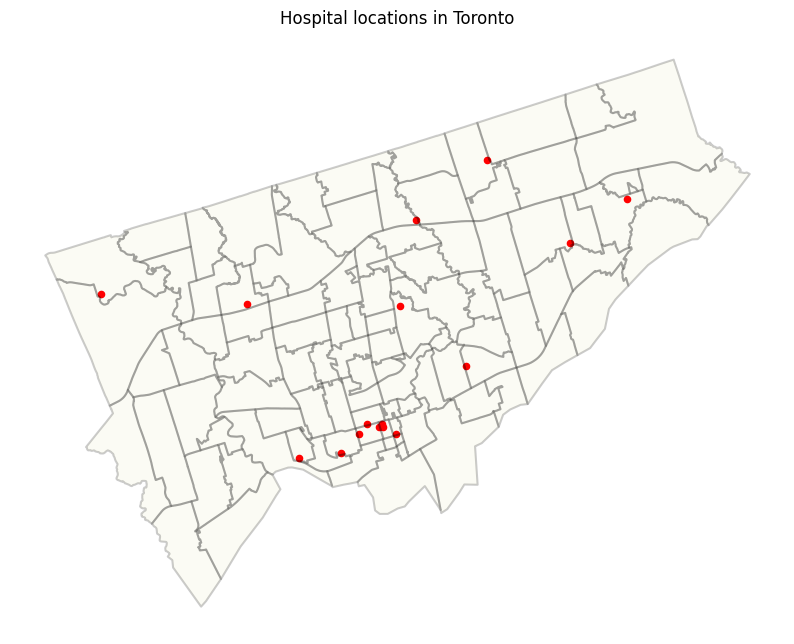

In [ ]:
### Your code here ###
#diplay the choropleth

#Q1C
#Plot the FSAs and the locations of hospitals in a single choropleth, where the
#hospitals are represented as red dots with a markersize of 20. Include a title
#, boundaries etc

gdf_all[gdf_all['proerpty_type'] == 'FSA'].plot(figsize=(10, 10), legend=True,
                                                color = 'beige',alpha=0.3)
gdf_all[gdf_all['proerpty_type'] == 'hospital'].plot(figsize=(10, 10), legend=True,
                                                           color='red', ax=plt.gca(),
                                                     alpha=1, markersize=20,
                                  marker = 'o') #ensures marker is a dot/circle

# plots boundary of map
gdf_all[gdf_all['proerpty_type'] == 'FSA'].boundary.plot(figsize=(10, 10),
                                        color = 'black', ax=plt.gca(),alpha=0.2)

plt.title('Hospital locations in Toronto')
plt.axis('off')
plt.show()



**Your Text Answer**
There does seem to be a visual imbalance in the distribution of hospitals, with a majority of the hopsitals in Toronto being concentrated in the southern-downtown area

### Q1d

In [ ]:
# calculate the centroid of each row in gdf_all if it is a polygon or MultiPolygon
## Your code here ###

def get_centroid(geom):
    if geom.geom_type == 'Polygon' or geom.geom_type == 'MultiPolygon':
        return geom.centroid
    else:
        return geom

gdf_all['centroid'] = gdf_all['geometry'].apply(get_centroid)


##your code end here ###

In [ ]:
# calculate the distance matrix between each FSA centriod and hospital
## Your code here ###

#Q1d - compute the distance matrix of the geometric distance
#between all pairs of (FSA centroid, hospital) as a DataFrame

fsa_centroid = gdf_all[gdf_all['proerpty_type'] == 'FSA'][['name', 'centroid']]
hospital_centroid = gdf_all[gdf_all['proerpty_type'] == 'hospital'][['name', 'centroid']]

# calculate the distance between each FSA and hospital
def get_distance_matrix(fsa_centroid, hospital_centroid) -> pd.DataFrame:
    distance_matrix = np.zeros((fsa_centroid.shape[0], hospital_centroid.shape[0]))
    for i in range(fsa_centroid.shape[0]):
        for j in range(hospital_centroid.shape[0]):
            distance_matrix[i, j] = fsa_centroid.iloc[i]['centroid'].distance(hospital_centroid.iloc[j]['centroid'])
    distance_matrix = pd.DataFrame(distance_matrix, index=fsa_centroid['name'].to_list(), columns=hospital_centroid['name'])
    return distance_matrix



distance_matrix = get_distance_matrix(fsa_centroid, hospital_centroid)
distance_matrix.head(5)

name,Scarborough Health Network - Centenary Hospital,Centre For Addiction and Mental Health - Queen Street Site,Sunnybrook Health Sciences Centre - Bayview Campus,Toronto Western Hospital,St. Joseph's Health Centre,Michael Garron Hospital,Etobicoke General Hospital,Humber River Hospital,Scarborough Health Network - General Campus,Scarborough Health Network - Birchmount Hospital,North York General Hospital,Toronto General Hospital,Hospital for Sick Children,Mount Sinai Hospital,Centre For Addiction and Mental Health - College Street Site,St. Michael's Hospital
M9R,0.365086,0.146369,0.186494,0.156309,0.117911,0.233066,0.057618,0.078006,0.317728,0.273428,0.211529,0.172316,0.173130,0.170388,0.161292,0.183388
M9V,0.391324,0.202029,0.220449,0.208868,0.176941,0.274522,0.013983,0.107479,0.346817,0.290978,0.233110,0.222667,0.223731,0.221119,0.212260,0.234141
M9W,0.385836,0.178507,0.209764,0.187347,0.151057,0.259992,0.023838,0.096522,0.339601,0.289709,0.229242,0.202582,0.203500,0.200794,0.191738,0.213871
M1P,0.067660,0.190490,0.111969,0.173655,0.217406,0.090713,0.329641,0.222007,0.022906,0.055718,0.092980,0.157066,0.157537,0.159487,0.165377,0.152953
M1R,0.097361,0.161511,0.082105,0.144695,0.187853,0.065660,0.301504,0.193196,0.049884,0.053526,0.068432,0.128541,0.129104,0.130923,0.136407,0.125230


### Q1e

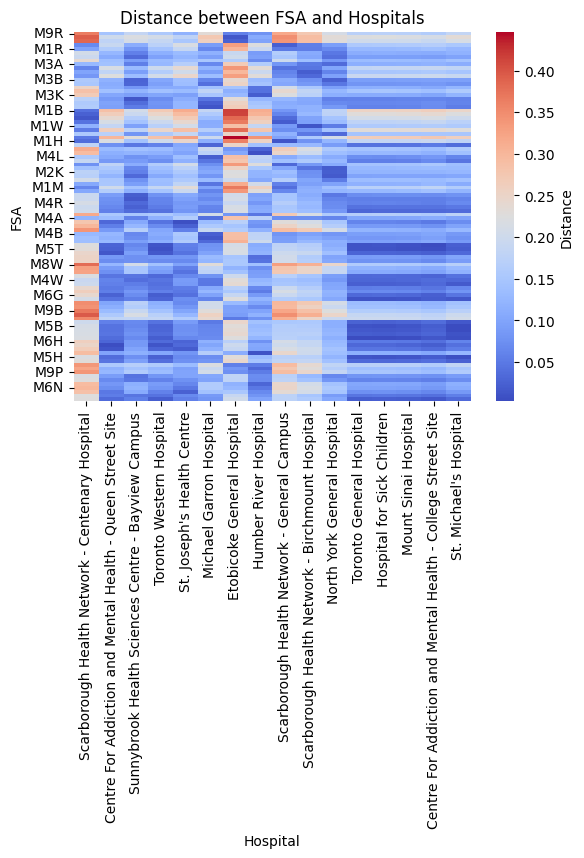

In [ ]:
warnings.filterwarnings('ignore')
import seaborn as sns
### you code here##
#plot the heatmap

sns.heatmap(distance_matrix, cmap='coolwarm', cbar_kws={'label': 'Distance'})
plt.title('Distance between FSA and Hospitals')
plt.xlabel('Hospital')
plt.ylabel('FSA')
plt.show()



**Your Text Answer**

The colormap is useful in identifying the areas that are located
 near (or far away) from certain hopsitals. However it is hard to identify the areas that are far away from their nearest hopsital. It would be more ideal to identify the distances between  FSA code's and their nearest hopsital in order to identify if there is unfairness in hospital distribution.

## Q2: Visualizing Health Network Fairness


### Q2a

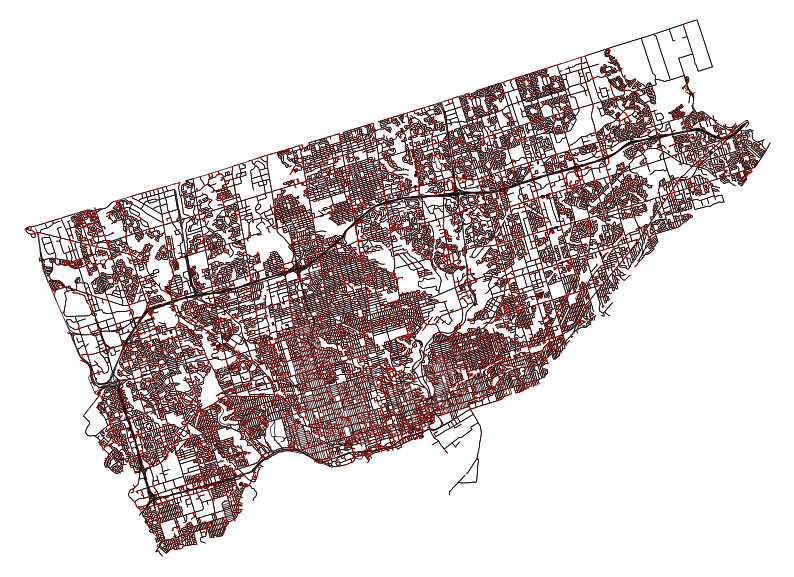

Number of nodes: 27353
Number of edges: 72977


In [ ]:
## you code here ##

#Q2a - Using the osmnx package, retrieve the drivable street map of Toronto

# the solution might take > 1 min to run

place = 'City of Toronto,Ontario, Canada'
street_map = ox.graph.graph_from_place(place, network_type='drive')
# got network type 'drive' from https://stackoverflow.com/questions/64166264/osmnx-list-of-network-types

ox.plot_graph(street_map, figsize=(10, 10), bgcolor='w',node_size=1,
              node_color='r', node_alpha = 0.5,
              edge_linewidth=0.5, edge_color='k')
plt.show()

print('Number of nodes:', street_map.number_of_nodes())
print('Number of edges:', street_map.number_of_edges())



**your text answer**

There are 27353 nodes and 72977 edges

### Q2b

In [ ]:
### DO NOT MODIFY ###
warnings.filterwarnings('ignore')
distance_matrix_by_shortest_path = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/distance_matrix_by_shortest_path.csv', index_col=0)
# create a new pandas series to store the nearest distance
smallest_distance_by_shortest_path = distance_matrix_by_shortest_path.min(axis=1)
# assign the name of the series for future merging
smallest_distance_by_shortest_path.name = 'nearest_hospital'

# obtain all row that is a foward sortation area
toronto_FSA.to_crs(epsg=4326, inplace=True)
toronto_FSA['centroid'] = toronto_FSA['geometry'].apply(lambda x: x.centroid)
# merge the distance series with the FSA shape data
gdf_smallest_distance_by_shortest_path = toronto_FSA.merge(smallest_distance_by_shortest_path, left_on='name', right_index=True).rename(columns={0: 'nearest_hospital'})
gdf_smallest_distance_by_shortest_path.head()
# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,geometry,proerpty_type,centroid,nearest_hospital
637,M9R,"POLYGON ((-79.56131 43.67478, -79.56249 43.674...",FSA,POINT (-79.55799 43.68778),6973.215
638,M9V,"POLYGON ((-79.57759 43.76205, -79.57829 43.761...",FSA,POINT (-79.59433 43.74274),1854.019
639,M9W,"POLYGON ((-79.53885 43.72937, -79.53884 43.728...",FSA,POINT (-79.58416 43.70983),2981.682
701,M1P,"POLYGON ((-79.24704 43.75374, -79.24720 43.753...",FSA,POINT (-79.27000 43.76213),2710.604
702,M1R,"MULTIPOLYGON (((-79.28125 43.73867, -79.27985 ...",FSA,POINT (-79.29717 43.74945),4471.884


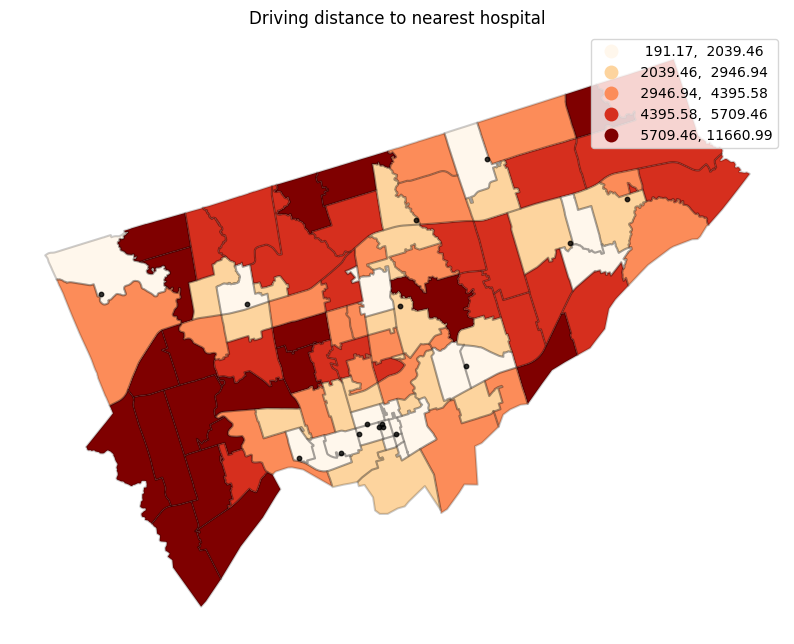

In [ ]:
## you code here ##

#Q2b - plot a cloropleth map for shortest driving distance from hopsital for
#      each FSA

gdf_smallest_distance_by_shortest_path.plot(column='nearest_hospital',
                                            legend=True, scheme='quantiles',
                                             cmap='OrRd', figsize=(10, 10))

gdf_smallest_distance_by_shortest_path.boundary.plot(figsize=(10, 10),
                                                     color = 'black',alpha=0.2,
                                                     ax = plt.gca()
                                                     )

# adding hopsitals
gdf_all[gdf_all['proerpty_type'] == 'hospital'].plot(color='black', alpha=0.8,
                                                 markersize=10, ax = plt.gca())
plt.title('Driving distance to nearest hospital')

plt.axis("off")
plt.show()



**your text answer**

There seems to be a noticable inbalance of hospitals distributed in Toronto. Neighbourhoods located in the far southwest of Toronto seem to lack a hopsital while neighbourhoods near downtown Toronto are very close to a hospital(s)

### Q2c

In [ ]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
census_data = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/2016_census.csv').iloc[:, 1:]
census_data.columns = ['name', 'median_income', 'population','visual_minority']
census_data['prec_visual_minority'] = census_data['visual_minority'] / census_data['population']
census_data = toronto_FSA.merge(census_data, on='name')
census_data = census_data[['name','prec_visual_minority','centroid']]
census_data.head()

# your output should be exactly the same as the expected output, if not, re-run given code in Q1

,name,prec_visual_minority,centroid
0,M9R,0.544557,POINT (-79.55799 43.68778)
1,M9V,0.814882,POINT (-79.59433 43.74274)
2,M9W,0.689214,POINT (-79.58416 43.70983)
3,M1P,0.737640,POINT (-79.27000 43.76213)
4,M1R,0.564003,POINT (-79.29717 43.74945)


In [ ]:
#2C - creating a folium map showing nearest hospital distances and impoverished
#     neighbourhoods

# empty folium map
nearest_hospital_map = fm.Map(location=[43.7, -79.4], zoom_start=12,
                                  scrollWheelZoom=False, tiles=None,
                                    control_scale=True)
# geo-json file with vector shape of FSA
FSA_json = gdf_smallest_distance_by_shortest_path[['name', 'geometry']].to_json()

## you code here ##

# layer 1
fm.TileLayer('openstreetmap').add_to(nearest_hospital_map)

# layer 2 - Displays the choropleth of the shortest drivable distance to the
#          nearest hospital

# have to drop centroid column or else I cant convert to json
gdf_shortest_path = gdf_smallest_distance_by_shortest_path.drop('centroid', axis=1)

FSA_json = gdf_shortest_path.to_json()
quantile = gdf_shortest_path['nearest_hospital'].quantile([0, 0.25, 0.5, 0.75, 1]).to_list()

fm.Choropleth( # create a choropleth layer
    geo_data=FSA_json, # feed in the json data for vector shape
    name='Distance from Nearest Hosptial', # name of the layer
    data=gdf_shortest_path, # feed in the dataframe for feature properties
    columns=['name', 'nearest_hospital'], # columns to use from the dataframe
    key_on='feature.properties.name', # key to match the json data and dataframe
    fill_color='OrRd', # color for the choropleth
    fill_opacity=0.4, # opacity of the fill color
    line_opacity=0.2, # opacity of the boundary line
    bins = quantile, # bins to classify the data
    legend_name='Distance from Nearest Hospital' # name of the legend
).add_to(nearest_hospital_map) # add the layer to the map


# layer 3 - Incorporates a circle marker at the centroid of each FSA. The
# radius of each circle corresponds to the percentage of visual minorities in FSA

minorities = fm.FeatureGroup(name="prec_visual_minority", control=True).add_to(nearest_hospital_map)

for index, row in census_data.iterrows():
    centroid = [row['centroid'].y, row['centroid'].x]
    fm.CircleMarker(centroid, radius=row['prec_visual_minority']*20, color='blue',
     fill=True, fill_color='blue').add_to(minorities)

nearest_hospital_map

# layer control
fm.LayerControl().add_to(nearest_hospital_map)
nearest_hospital_map

### MAKE SURE TO SCREENSHOT THIS ##
##
##
##
## MAKE SURE TO SCREENSHOT THIS ##


### Q2d
**your text answer**

From this map, it is unclear if there is a distinguishable relationship between minority residences and hospital location. It seems that FSA's on the outskirts of Toronto have low accessibility to hospitals regardless of the presence of a minority population. And FSA's near the downtown area of Toronto, have a high accessibility to hospitals.  

## Q3: Raster Data (OPTIONAL: THIS QUESTION DOES NOT COUNT TOWARDS THE TOTAL GRADE)

In [ ]:
## DO NOT MODIFY ##
warnings.filterwarnings('ignore')
url = 'https://www.arcgis.com/sharing/rest/content/items/4b1863b58f9a4aa98f3eb4e95299cff2/data'
raster_data = rxr.open_rasterio(url,masked=True).squeeze() # open the raster data

### Q3a

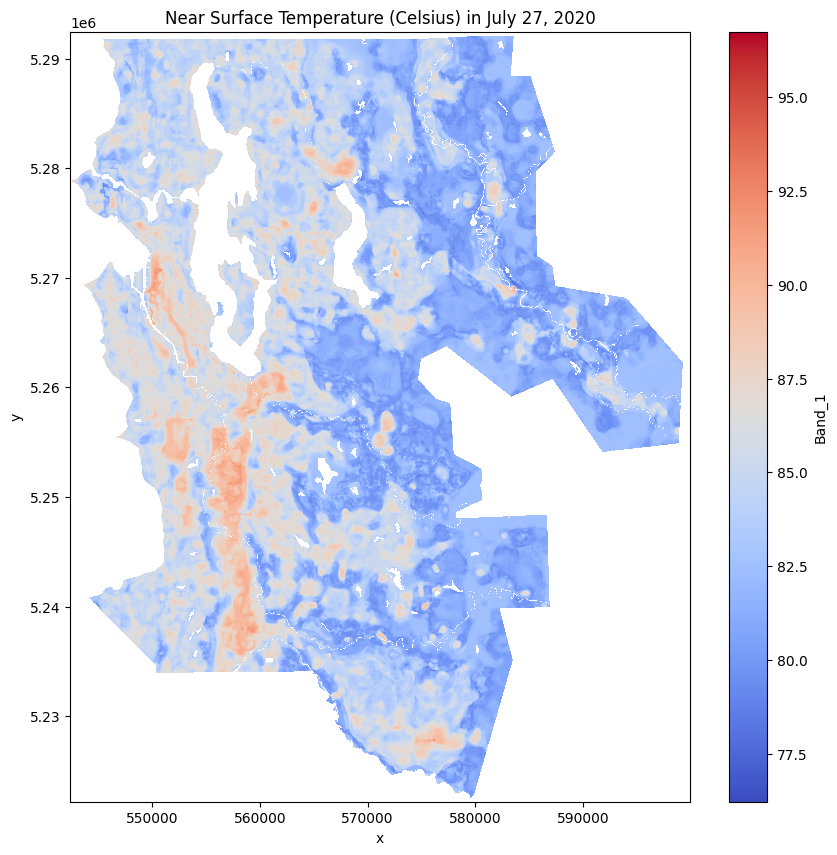

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
## your code here ##

raster_data.plot.imshow(ax=ax, cmap='coolwarm', add_colorbar=True) # include the color bar
ax.set_title('Near Surface Temperature (Farenheit) in July 27, 2020')
plt.show()

# plot the raster_data
# you might encounter following error when plotting  'ERROR 1: Line 22: </table> doesn't have matching <table>'
# please let the code run, it will generate the plot.

In [ ]:
# what is the shape, the CRS?
print("shape of raster data :", raster_data.rio.shape)
print('CRS of the raster data:', raster_data.rio.crs)

shape of raster data : (7025, 5759)
CRS of the raster data: EPSG:32610


**your text answer**

The urban heat island effect refers to highly populated areas such as downtown areas in a city being significantly hotter than surrounding areas due to the high level of activity and people in the area. From this, we can infer that the urban areas of seattle are the areas with high near surface temp (the areas highlighted in red)

### Q3b

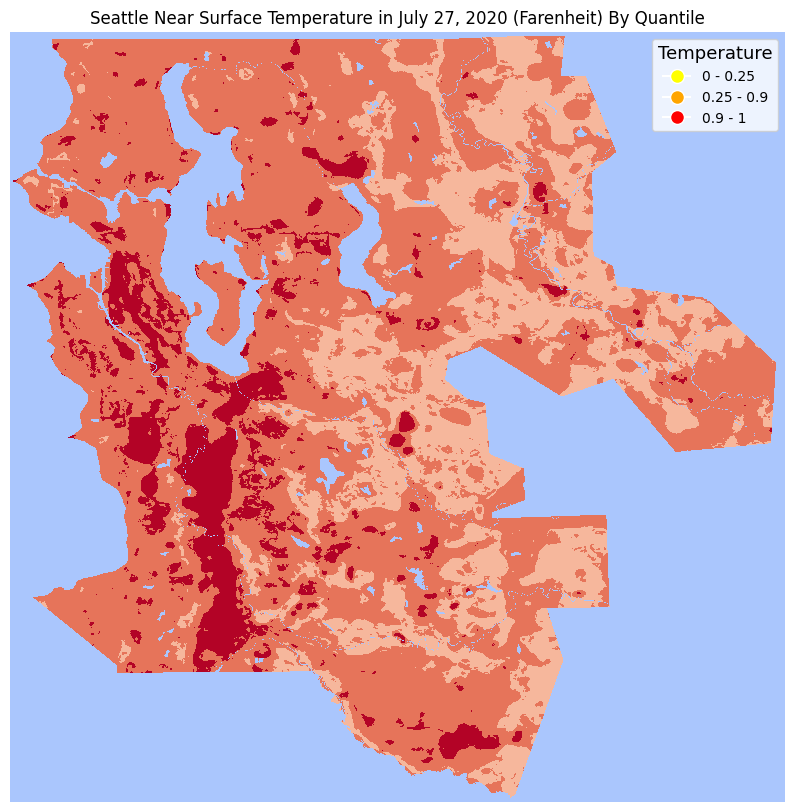

In [ ]:
import xarray as xr
## your code here ##
raster_data_classified = xr.apply_ufunc(np.digitize, raster_data,
raster_data.quantile([0,0.25, 0.9, 1]).values) #classify the data using given quantile boundary 0 - 0.25, 0.25-0.8, 0.8 - 1, and > 1

raster_data_classified = raster_data_classified.where(raster_data_classified != 4, -1) # re-map the bakcground to -1, instead of highest class
# I remapped to class -1 instead of 0 because its easier to identify high
# temperature urban areas vs neighbouring areas


fig, ax = plt.subplots(figsize=(10,10))
raster_data_classified.plot.imshow(ax=ax, cmap='coolwarm', add_colorbar = False)


# in default, legend in rasterdata is a color bar for continuous data, we will create a custom legend
from matplotlib.lines import Line2D
colors = ['yellow', 'orange', 'red']
legend_handles = [Line2D([0], [0], marker='o', color='w', label='0 - 0.25', markerfacecolor=colors[0], markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='0.25 - 0.9', markerfacecolor=colors[1], markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='0.9 - 1', markerfacecolor=colors[2], markersize=10)]

plt.legend(handles=legend_handles, title='Temperature', title_fontsize='13', loc='upper right')
plt.title('Seattle Near Surface Temperature in July 27, 2020 (Farenheit) By Quantile')
plt.axis('off')
plt.show()


**you text answer**
The areas in the 0.9 -1 quantile (dark red) should identify urban areas. This matches the observation made in the previous map.

### Q3c
**you text answer**
Based on the map of seattle provided, it does seem that the hypothesis is correct. For example the area where the space needle is located is in downtown seattle, and from the quantile map, the area is between the 0.25 - 0.9 and 0.9 - 1 quantile in near surface temp; indicating that urban arease are indeed hotter. In contrast, Cougar Mountain Regional Wildland Park is in the 0-0.25 quantile of near surface temp which make sense due to the low level of urban activity in the area.